## Diabetes Risk: Predicting Outcomes in Homogeneous Populations

<img src="https://images.squarespace-cdn.com/content/v1/5a21a88bcd39c3ec782756ed/1519148471554-P8KM1H55H4ZXM3QWC2EJ/Diabetes12.jpg?format=2500w" width=500>

---

### **Part 1: Loading and Parsing the Data**

**Load the study data from the `mlpp24/data/diabetes/` folder.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import plotly.graph_objects as go
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/Shareddrives/mlpp24/data/diabetes/diabetes.csv"
data = pd.read_csv(filepath, skiprows=0)

**Display the contents of this data and describe <u>in your own words</u> what the content of each column is, including units where appropriate.**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age.

Pregnancies : Number of times pregnant.

Glucose :Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure : Diastolic blood pressure (mm Hg)

SkinThickness : Triceps skin fold thickness (mm)

Insulin : 2-Hour serum insulin (mu U/ml)

BMI : Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction : Diabetes pedigree function

Age : Age (years)

Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0



In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Make a 3x3 panel plot with the histograms of each of the nine columns.**

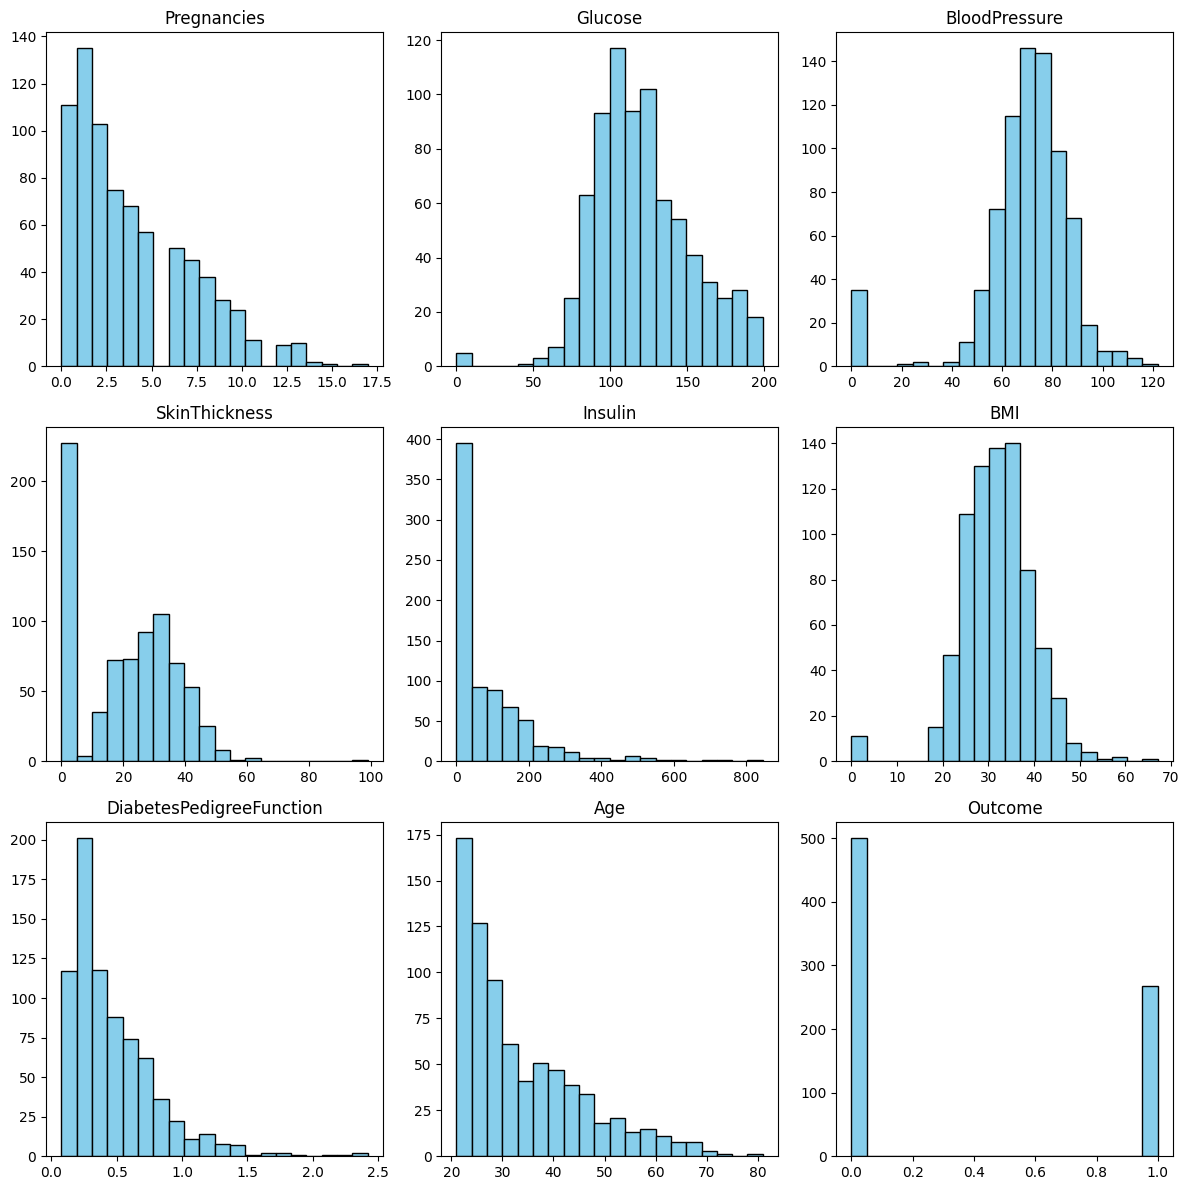

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs = axs.flatten()

# Plot histograms for each column
for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column)

plt.tight_layout()

plt.show()

**Describe what information you can infer from each histogram in this plot.**

There are some attributes with many zeros. Pregencies seems skewed and BMI seems normally distributed. There is a need to remove zeros as possible.

**Remove rows for which the values of any of the columns are not physically possible (e.g., it is not possible to have a BMI of $0$).**

In [ ]:
# Remove rows with physically impossible values
data = data[(data["BMI"] != 0) & (data["Glucose"] != 0) & (data["BloodPressure"] != 0) &
            (data["SkinThickness"] != 0) & (data["Insulin"] != 0)]

# Reset index after removing rows
data.reset_index(drop=True, inplace=True)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,1
388,1,128,88,39,110,36.5,1.057,37,1
389,2,88,58,26,16,28.4,0.766,22,0
390,10,101,76,48,180,32.9,0.171,63,0


**Re-plot the 3x3 panel plot of histograms with this new subset of the data.**

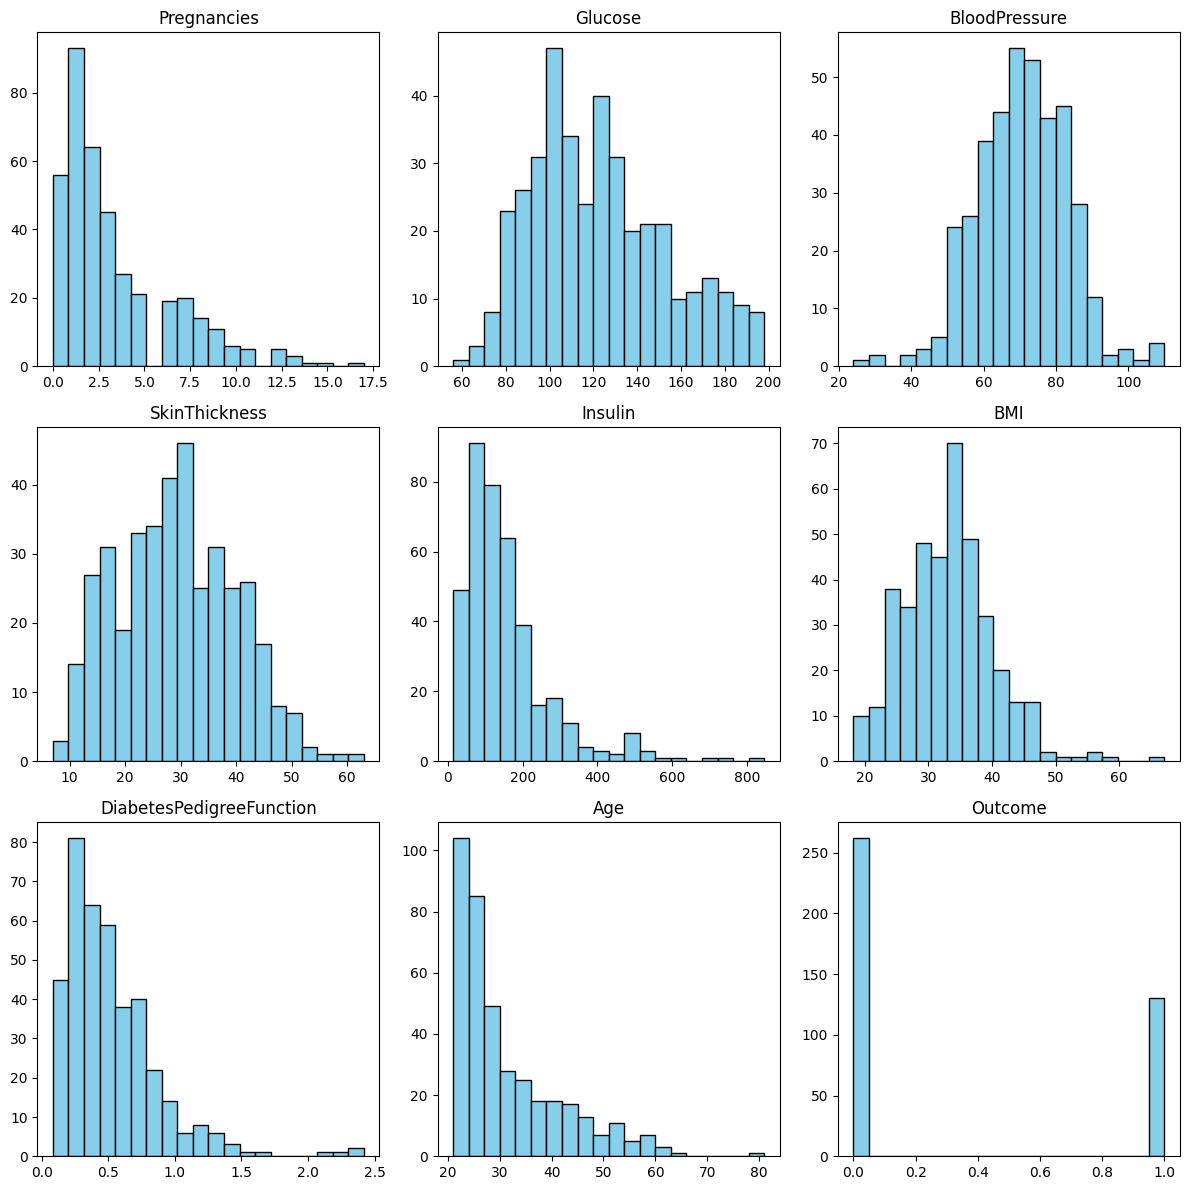

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs = axs.flatten()

# Plot histograms for each column
for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column)

plt.tight_layout()

plt.show()

## **Part 2: Fitting a Logistic Regression Model**

First, let's run a logistic regression model on a single feature.

**Create features and targets objects from the subset of the data that you created above where the features are only blood pressure and the target is the outcome.**

In [ ]:
features = data[['BloodPressure']]
target = data['Outcome']

**Instantiate and fit a logistic regression model to this feature and target using `sklearn`'s `LogisticRegression`.**

In [ ]:
# Instantiate the logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the features and target
logistic_model.fit(features, target)


LogisticRegression()

<b>

Use `plotly` to make a scatter plot of blood pressure vs outcome that contains

- the raw data using black points with an alpha (transparency) value of $0.2$;
- the logistic regression model predictions using blue points that are slightly smaller than the raw data points; and
- the best fit probabilty curve (i.e., the logistic function) from the logistic regression model.

</b>

In [ ]:
# Obtain predictions from the logistic regression model
predictions = logistic_model.predict(features)
probabilities = logistic_model.predict_proba(features)[:, 1]  # Probabilities of positive class

# Create scatter plot
fig = go.Figure()

# Plot raw data
fig.add_trace(go.Scatter(
    x=features['BloodPressure'],
    y=target,
    mode='markers',
    marker=dict(color='black', opacity=0.2),
    name='Raw Data'
))

# Plot model predictions
fig.add_trace(go.Scatter(
    x=features['BloodPressure'],
    y=predictions,
    mode='markers',
    marker=dict(color='blue', size=6, opacity=0.6),
    name='Model Predictions'
))

# Sort the features and probabilities for smoother curve plotting
sorted_indices = np.argsort(features['BloodPressure'])
sorted_bp = features['BloodPressure'].iloc[sorted_indices]
sorted_probs = probabilities[sorted_indices]

# Plot logistic function curve
fig.add_trace(go.Scatter(
    x=sorted_bp,
    y=sorted_probs,
    mode='lines',
    line=dict(color='red', width=2),
    name='Logistic Function'
))

# Update layout
fig.update_layout(
    title='Blood Pressure vs. Outcome',
    xaxis_title='Blood Pressure',
    yaxis_title='Outcome',
)

# Show plot
fig.show()



**Discuss what you can infer from this plot.**

Logistic regression assumes that the relationship between blood pressure and the outcome is linear and it is upward.(Positve slope and Positive relation)

**Calculate the accuracy of this model by counting the number of target values that were correctly predicted and dividing by the total number of target values.**

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(target, predictions)

# Display accuracy
print("Accuracy:", accuracy)


Accuracy: 0.6760204081632653


Now let's fit a model that uses all features.

**Instantiate and fit a logistic regression model that uses all available features to predict the outcome.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting all columns except the 'Outcome' column as features
all_features = data.drop(columns=['Outcome'])

# Scale the features
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

# Instantiate the logistic regression model with increased max_iter
logistic_model_all_features = LogisticRegression(max_iter=1000)

# Fit the model to all features and target
logistic_model_all_features.fit(all_features_scaled, target)

# Obtain predictions from the logistic regression model using all features
predictions_all_features = logistic_model_all_features.predict(all_features_scaled)


**Calculate the accuracy for this model.**

In [ ]:
# Calculate accuracy
accuracy_all_features = accuracy_score(target, predictions_all_features)

# Display accuracy
print("Accuracy (Using All Features):", accuracy_all_features)

Accuracy (Using All Features): 0.7831632653061225


**If someone were to ask you if either of the two models that you just fit are "good" models, what would you say? (250 words max)**

I would say that the first model is bad as the accuracy is low(0.67). It is like 1 out 3 are wrong.

I would say that second one is good as it yields good accuracy of 0.78.

## **Part 3: Fitting a Decision Tree Model**

**Fit a decision tree classifier that uses all available features to predict the outcome.**

In [ ]:
# Instantiate the decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the model to all features and target
decision_tree_model.fit(all_features, target)

# Obtain predictions from the decision tree model using all features
predictions_decision_tree = decision_tree_model.predict(all_features)

# Calculate accuracy
accuracy_decision_tree = accuracy_score(target, predictions_decision_tree)

# Display accuracy
print("Accuracy (Decision Tree):", accuracy_decision_tree)


Accuracy (Decision Tree): 1.0


**What feature is used to create the first split (i.e., the root node)?**

In [ ]:
# Get the index of the feature used for the first split
first_split_feature_index = decision_tree_model.tree_.feature[0]

# Get the name of the feature
first_split_feature = all_features.columns[first_split_feature_index]

# Display the feature used for the first split
print("Feature used for the first split:", first_split_feature)


Feature used for the first split: Glucose


**How does the accuracy of the decision tree model compare with the logistic regression models?**

In [ ]:
# Display accuracy of logistic regression model using all features
print("Accuracy (Logistic Regression with all features):", accuracy_all_features)

# Display accuracy of decision tree model
print("Accuracy (Decision Tree):", accuracy_decision_tree)


Accuracy (Logistic Regression with all features): 0.7831632653061225
Accuracy (Decision Tree): 1.0


The accuracy of Decision Tree 1.0 which indicates perfect. As discussed in the class, it is very powerful.
Relatively Logistic Regression Model gave very lesser accuracy.


**Do the two models fail on the same cases (objects) or different cases?**

In [ ]:
# Find cases where logistic regression model and decision tree model predictions differ
discrepancies = (predictions_all_features != predictions_decision_tree)

# Print the indices of cases where the predictions differ
print("Indices of cases where predictions differ:", np.where(discrepancies)[0])


Indices of cases where predictions differ: [  2   6   8  11  13  18  24  31  41  44  49  57  60  73  80  82  90  91
  94  95  96 101 102 104 107 110 117 119 122 123 125 134 135 136 140 142
 143 144 146 147 152 153 155 163 164 168 172 176 183 204 208 210 212 220
 228 235 241 242 248 250 252 255 263 276 277 283 294 295 301 312 325 329
 330 332 337 339 340 345 346 348 357 363 371 374 382]


**How much worse is the accuracy of a decision tree model that uses all of the features *except* the one that was used to create the root node in the model above?**

In [ ]:
# Exclude the feature used for the first split
excluded_feature = first_split_feature
remaining_features = all_features.drop(columns=[excluded_feature])

# Instantiate and fit the decision tree classifier with remaining features
decision_tree_model_excluded = DecisionTreeClassifier()
decision_tree_model_excluded.fit(remaining_features, target)

# Obtain predictions from the decision tree model using remaining features
predictions_decision_tree_excluded = decision_tree_model_excluded.predict(remaining_features)

# Calculate accuracy
accuracy_decision_tree_excluded = accuracy_score(target, predictions_decision_tree_excluded)

# Display accuracy
print("Accuracy (Decision Tree Excluding {}):".format(excluded_feature), accuracy_decision_tree_excluded)


Accuracy (Decision Tree Excluding Glucose): 1.0
